In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Raw Processed Data

Text(0.5, 1.0, 'Raw Data')

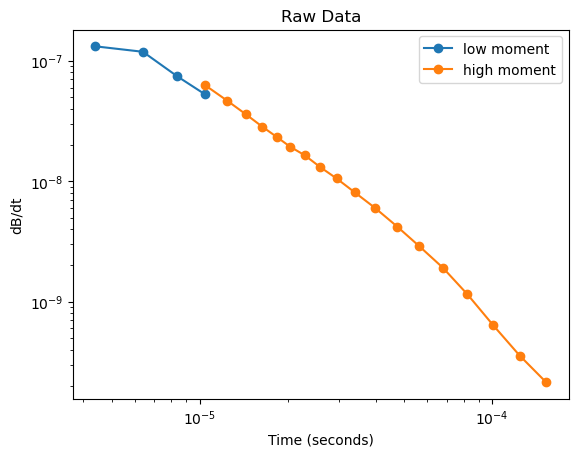

In [8]:
headers = "TIMESTAMP  LINE_NO      UTMX       UTMY  ELEVATION  CHANNEL_NO  RX_ALTITUDE  RX_ALTITUDE_STD  TX_ALTITUDE  TX_ALTITUDE_STD  TILT_X  TILT_X_STD  TILT_Y  TILT_Y_STD  FIELDPOLARITY  CURRENT  TX_AREA  NUMGATES  DBDT_Ch1GT1  DBDT_Ch1GT2  DBDT_Ch1GT3  DBDT_Ch1GT4  DBDT_Ch1GT5  DBDT_Ch1GT6  DBDT_Ch1GT7  DBDT_Ch1GT8  DBDT_Ch1GT9  DBDT_Ch1GT10  DBDT_Ch1GT11  DBDT_Ch1GT12  DBDT_Ch1GT13  DBDT_Ch1GT14  DBDT_Ch1GT15  DBDT_Ch2GT1  DBDT_Ch2GT2  DBDT_Ch2GT3  DBDT_Ch2GT4  DBDT_Ch2GT5  DBDT_Ch2GT6  DBDT_Ch2GT7  DBDT_Ch2GT8  DBDT_Ch2GT9  DBDT_Ch2GT10  DBDT_Ch2GT11  DBDT_Ch2GT12  DBDT_Ch2GT13  DBDT_Ch2GT14  DBDT_Ch2GT15  DBDT_Ch2GT16  DBDT_Ch2GT17  DBDT_Ch2GT18  DBDT_Ch2GT19  DBDT_Ch2GT20  DBDT_Ch2GT21  DBDT_Ch2GT22  DBDT_Ch2GT23  DBDT_Ch2GT24  DBDT_Ch2GT25  DBDT_Ch2GT26  DBDT_Ch2GT27  DBDT_Ch2GT28  DBDT_Ch2GT29  DBDT_Ch2GT30  DBDT_STD_Ch1GT1  DBDT_STD_Ch1GT2  DBDT_STD_Ch1GT3  DBDT_STD_Ch1GT4  DBDT_STD_Ch1GT5  DBDT_STD_Ch1GT6  DBDT_STD_Ch1GT7  DBDT_STD_Ch1GT8  DBDT_STD_Ch1GT9  DBDT_STD_Ch1GT10  DBDT_STD_Ch1GT11  DBDT_STD_Ch1GT12  DBDT_STD_Ch1GT13  DBDT_STD_Ch1GT14  DBDT_STD_Ch1GT15  DBDT_STD_Ch2GT1  DBDT_STD_Ch2GT2  DBDT_STD_Ch2GT3  DBDT_STD_Ch2GT4  DBDT_STD_Ch2GT5  DBDT_STD_Ch2GT6  DBDT_STD_Ch2GT7  DBDT_STD_Ch2GT8  DBDT_STD_Ch2GT9  DBDT_STD_Ch2GT10  DBDT_STD_Ch2GT11  DBDT_STD_Ch2GT12  DBDT_STD_Ch2GT13  DBDT_STD_Ch2GT14  DBDT_STD_Ch2GT15  DBDT_STD_Ch2GT16  DBDT_STD_Ch2GT17  DBDT_STD_Ch2GT18  DBDT_STD_Ch2GT19  DBDT_STD_Ch2GT20  DBDT_STD_Ch2GT21  DBDT_STD_Ch2GT22  DBDT_STD_Ch2GT23  DBDT_STD_Ch2GT24  DBDT_STD_Ch2GT25  DBDT_STD_Ch2GT26  DBDT_STD_Ch2GT27  DBDT_STD_Ch2GT28  DBDT_STD_Ch2GT29  DBDT_STD_Ch2GT30".split()
raw_data = np.loadtxt("Data/Ball_Ranch_tTEM_proc_BP_AVG_export.xyz", comments='/')
times_channel_1 = "1.390E-06 4.390E-06 6.390E-06 8.390E-06 1.039E-05 1.239E-05 1.439E-05 1.639E-05 1.839E-05 2.039E-05 2.289E-05 2.589E-05 2.939E-05 3.389E-05 3.989E-05 ".split()
times_channel_2 = "1.390E-06 4.390E-06 6.390E-06 8.390E-06 1.039E-05 1.239E-05 1.439E-05 1.639E-05 1.839E-05 2.039E-05 2.289E-05 2.589E-05 2.939E-05 3.389E-05 3.989E-05 4.739E-05 5.639E-05 6.789E-05 8.239E-05 1.009E-04 1.244E-04 1.534E-04 1.904E-04 2.369E-04 2.949E-04 3.684E-04 4.609E-04 5.774E-04 7.239E-04 9.084E-04 ".split()
times_channel_1 = np.array(times_channel_1).astype(float)
times_channel_2 = np.array(times_channel_2).astype(float)

df_raw_data = pd.DataFrame(data=raw_data, columns=headers)

ch1_names = [f"DBDT_Ch1GT{ii+1:d}" for ii in range(15)]
ch2_names = [f"DBDT_Ch2GT{ii+1:d}" for ii in range(30)]

df_raw_data_ch1 = df_raw_data.loc[df_raw_data['CHANNEL_NO']==1.]
df_raw_data_ch2 = df_raw_data.loc[df_raw_data['CHANNEL_NO']==2.]

i_sounding = 2
tmp_values_ch1 = df_raw_data_ch1[ch1_names].values[i_sounding,:]
tmp_values_ch1[tmp_values_ch1==9999.] = np.nan

tmp_values_ch2 = df_raw_data_ch2[ch2_names].values[i_sounding,:]
tmp_values_ch2[tmp_values_ch2==9999.] = np.nan


plt.loglog(times_channel_1, tmp_values_ch1, 'o-', label = 'low moment')
plt.loglog(times_channel_2, tmp_values_ch2, 'o-', label = 'high moment')
plt.xlabel('Time (seconds)')
plt.ylabel('dB/dt')
plt.legend()
plt.title("Raw Data")


## Data From Inversions

In [9]:
import io
def read_work_bench_xyz_dat(fname):
    with open(fname, 'r') as fid:
        lines = fid.readlines()
    n_header_max = 100
    for ii, line in enumerate(lines):
        if '/' in line:
            pass
        else:
            break
    header = lines[ii-1].split()[1:]
    times = np.array([lines[ii-2].split()[1:]]).astype(float)
    raw_data = np.loadtxt(fname, comments='/')
    df =  pd.DataFrame(data=raw_data, columns=header)
    data_names = [f"DATA_{i+1:d}" for i in range(25)]
    data = df[data_names].values
    data[data==9999.]=np.nan
    return df, data, times[0]

df_inv, data_inv, times_inv = read_work_bench_xyz_dat("Data/Inversion_FIles/SCI3_I01_MOD_dat.xyz")


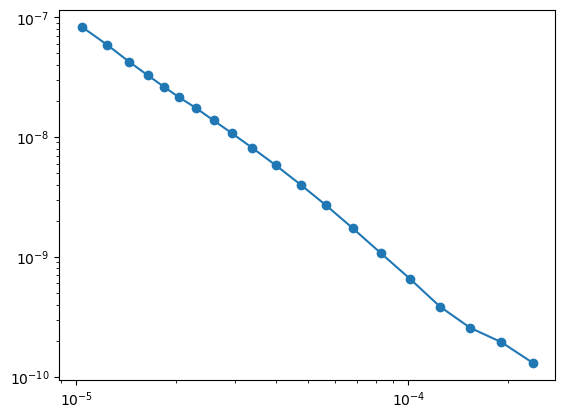

In [10]:
i_sounding = 25
plt.loglog(times_inv, data_inv[i_sounding], 'o-')

## Compare raw data and data from inversion

In [11]:
i_sounding = 18

#get inverse data 
time_stamp = df_inv.TIMESTAMP.unique()[i_sounding]
loc_inverse_data = df_inv.loc[df_inv.TIMESTAMP==time_stamp].index.values
lm_inv = data_inv[loc_inverse_data[0]]
hm_inv = data_inv[loc_inverse_data[1]]
lm_time = times_inv[0:3]
hm_tim = times_inv[3:]

#get raw data
df_raw_data_temp = df_raw_data[abs(df_raw_data.TIMESTAMP-time_stamp)<0.00001]

df_raw_data_ch1 = df_raw_data_temp.loc[df_raw_data_temp['CHANNEL_NO']==1.]
df_raw_data_ch2 = df_raw_data_temp.loc[df_raw_data_temp['CHANNEL_NO']==2.]

tmp_values_ch1 = df_raw_data_ch1[ch1_names].values[0]
tmp_values_ch1[tmp_values_ch1==9999.] = np.nan

tmp_values_ch2 = df_raw_data_ch2[ch2_names].values[0]
tmp_values_ch2[tmp_values_ch2==9999.] = np.nan


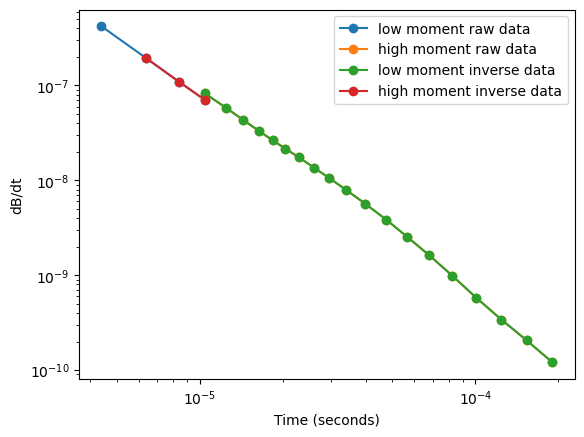

In [12]:
plt.loglog(times_channel_1, tmp_values_ch1, 'o-', label = 'low moment raw data')
plt.loglog(times_channel_2, tmp_values_ch2, 'o-', label = 'high moment raw data')
plt.loglog(times_inv, lm_inv, 'o-', label = 'low moment inverse data')
plt.loglog(times_inv, hm_inv, 'o-', label = 'high moment inverse data')
plt.xlabel('Time (seconds)')
plt.ylabel('dB/dt')
plt.legend()
